In [1]:
import modbampy
from modbampy import ModBam
path = './data/prom_R10.4.1_E8.2_WGS_brain_DMR_regions.bam'

In [3]:
import pandas as pd

def retrievePositionsDF(path):
    names=["chromosome", "chromStart", "chromEnd", "geneName", "POO"]
    positions_df = pd.read_csv(path, names=names, sep="\t")
    return positions_df


In [4]:
dmr_coords_path = './feature_references/fig6_features/mm39_dmr_coordinates.bed'


In [5]:
def retrievePositionsFromDF(df):
    dict_of_coordinates = {}
    for line, value in df.iterrows():
        index = value[3]
        sub_dict = {
            "chromosome" : value[0],
            "chromStart" : value[1],
            "chromEnd" : value[2]
        }
        coord_dict = {index : sub_dict}
        dict_of_coordinates.update(coord_dict)
    return dict_of_coordinates

coord_dict = retrievePositionsFromDF(retrievePositionsDF(dmr_coords_path))

In [6]:
with ModBam('./data/prom_R10.4.1_E8.2_WGS_brain_DMR_regions.bam') as bam: 
    mod_data_list = []
    for read in bam.reads("chr11", 11975124, 11977097):
        for pos_mod in read.mod_sites:
            data_list = []
            for datum in pos_mod[0:8]:
                data_list.append(datum)
            mod_data_list.append(data_list)

In [7]:
with ModBam('./data/prom_R10.4.1_E8.2_WGS_brain_DMR_regions.bam') as bam: 
    for gene in coord_dict.values():
        gene_mod_data_list = []
        for read in bam.reads(gene["chromosome"], gene["chromStart"], gene["chromEnd"]):
            read_mod_sites = []
            for modified_base_position in read.mod_sites:
                modified_base_list = []
                modified_base_list.append(gene["chromosome"])
                modified_base_list.append(gene["chromStart"])
                modified_base_list.append(gene["chromEnd"])
                for item in modified_base_position[0:8]:
                    modified_base_list.append(item)
                read_mod_sites.append(modified_base_list)
            gene_mod_data_list.append(read_mod_sites)

In [8]:
df_list = []
names=["chromosome", "chromStart", "chromEnd", "read", "refPos", "qPos", "refStrand", "modStrand", "base", "mod", "score"]
for df in gene_mod_data_list:
    df_list.append(pd.DataFrame(df, columns=names))
all_imprinted_genes = pd.concat(df_list)

In [9]:
all_imprinted_genes

,chromosome,chromStart,chromEnd,read,refPos,qPos,refStrand,modStrand,base,mod,score
0,chr18,13104983,13108058,2207c512-2b8d-4646-83bd-d9aa2ff94b27,-1,2,-,0,C,h,15
1,chr18,13104983,13108058,2207c512-2b8d-4646-83bd-d9aa2ff94b27,-1,2,-,0,C,m,239
2,chr18,13104983,13108058,2207c512-2b8d-4646-83bd-d9aa2ff94b27,-1,11,-,0,C,h,96
3,chr18,13104983,13108058,2207c512-2b8d-4646-83bd-d9aa2ff94b27,-1,11,-,0,C,m,147
4,chr18,13104983,13108058,2207c512-2b8d-4646-83bd-d9aa2ff94b27,13100731,125,-,0,C,h,0
...,...,...,...,...,...,...,...,...,...,...,...
77,chr18,13104983,13108058,38e3ddc2-ff4d-4e8c-8767-ef0dc01c0332,13112767,4874,-,0,C,m,0
78,chr18,13104983,13108058,38e3ddc2-ff4d-4e8c-8767-ef0dc01c0332,-1,4886,-,0,C,h,8
79,chr18,13104983,13108058,38e3ddc2-ff4d-4e8c-8767-ef0dc01c0332,-1,4886,-,0,C,m,0
80,chr18,13104983,13108058,38e3ddc2-ff4d-4e8c-8767-ef0dc01c0332,-1,4896,-,0,C,h,186


In [10]:
import pandas as pd
names=["read", "refPos", "qPos", "refStrand", "modStrand", "base", "mod", "score"]
site_read_df = pd.DataFrame(mod_data_list, columns=names)
site_read_filt_df = site_read_df.loc[(site_read_df["refPos"] > 11975124) & (site_read_df["refPos"] < 11977097) & (site_read_df["score"] > (0.66)*(255))] 

In [37]:
site_read_withUnmod = site_read_df.pivot(index=["read", "refPos", "qPos"], columns="mod", values="score").reset_index()
site_read_withUnmod["c"] = 255 - site_read_withUnmod[["h", "m"]].sum(axis=1)
melted_sites = pd.melt(site_read_withUnmod, ["read", "refPos", "qPos"], ["h", "m", "c"], "mod", "score")

mod,read,refPos,qPos,h,m
0,015768c1-1c55-4c69-aeab-584985c51187,-1,7336,64,5
1,015768c1-1c55-4c69-aeab-584985c51187,-1,7346,13,4
2,015768c1-1c55-4c69-aeab-584985c51187,11972410,47,3,252
3,015768c1-1c55-4c69-aeab-584985c51187,11972545,184,5,250
4,015768c1-1c55-4c69-aeab-584985c51187,11972989,631,3,252
...,...,...,...,...,...
9233,ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3,11976261,11002,2,3
9234,ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3,11976263,11004,3,1
9235,ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3,11976276,11017,3,3
9236,ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3,11976281,11022,2,2


In [127]:
melted_sites_filt = melted_sites.loc[(melted_sites["refPos"] > 11975124) & (melted_sites["refPos"] < 11977097) & (melted_sites["score"] > (0.66)*(255))]
pivoted_cpg_melted = melted_sites_filt.pivot(index="refPos", columns=["read"], values="mod")
pivoted_cpg_melted[pivoted_cpg_melted == "h"] = 2
pivoted_cpg_melted[pivoted_cpg_melted == "m"] = 1
pivoted_cpg_melted[pivoted_cpg_melted == "c"] = 0
pivoted_cpg_melted

read,015768c1-1c55-4c69-aeab-584985c51187,0877f122-ad74-4614-a710-04e9c109a3f2,11d113f0-c179-4f4e-938f-b7af31514c8c,129f3234-a07e-4968-97e1-da4a8ad58b40,1388c044-945d-44af-9503-d2b6242445c8,15ff802c-6e45-4242-b009-82572dc015a5,1bb1ff9f-ccac-4b41-acbb-6309a639e96e,23656b16-17cd-4460-85be-b5ad1ea813bd,252c8aec-42e0-401c-a827-90473b62b8f5,2699e361-82f6-44b7-a43d-ad2a88f28b80,...,cc6b59db-cd95-4939-9ce9-c15ffdb3cbcb,db10d5ae-116b-4ef4-bf99-8ce628966c0f,e0bfb552-8c34-49c4-9c74-cc9c8138696b,e16c2f80-79fe-43b1-88a0-141ad4b568cd,e252a51b-dbd4-4888-b5c3-d853cc8415b3,e907d8ca-2266-4722-9bac-6dcb75f84576,e9c3118a-c3b0-47e3-8ea3-424ea6967ab6,f065543b-2f98-41f5-874b-096737f506fa,f329a921-1aff-4e0f-841a-47848a548722,ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3
refPos,,,,,,,,,,,,,,,,,,,,,
11975176,NaN,NaN,1,NaN,NaN,1,1,NaN,NaN,NaN,...,NaN,1,NaN,NaN,1,1,NaN,NaN,NaN,NaN
11975177,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,2
11975262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11975277,NaN,NaN,1,1,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11975278,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11976989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11977004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11977041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [340]:
melted_sites_filt = melted_sites.loc[(melted_sites["refPos"] > 11975124) & (melted_sites["refPos"] < 11977097) & (melted_sites["score"] > (0.66)*(255))]
pivoted_cpg_melted = melted_sites_filt.pivot(index="read", columns=["refPos"], values="mod")
pivoted_cpg_melted[pivoted_cpg_melted == "h"] = 2
pivoted_cpg_melted[pivoted_cpg_melted == "m"] = 1
pivoted_cpg_melted[pivoted_cpg_melted == "c"] = 0

In [342]:
pivoted_cpg_melted.head()

refPos,11975176,11975177,11975262,11975277,11975278,11975380,11975386,11975390,11975401,11975410,...,11976959,11976982,11976983,11976985,11976986,11976989,11977004,11977041,11977095,11977096
read,,,,,,,,,,,,,,,,,,,,,
015768c1-1c55-4c69-aeab-584985c51187,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
0877f122-ad74-4614-a710-04e9c109a3f2,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11d113f0-c179-4f4e-938f-b7af31514c8c,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,...,NaN,2,NaN,2,NaN,NaN,NaN,NaN,1,NaN
129f3234-a07e-4968-97e1-da4a8ad58b40,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,...,NaN,1,NaN,1,NaN,NaN,NaN,NaN,1,NaN
1388c044-945d-44af-9503-d2b6242445c8,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,2


In [389]:
len(pivoted_cpg_melted)/2

27.0

In [394]:
def NADropper(df):
    df = df.dropna(thresh=20, axis=1)
    df = df.dropna(thresh=20, axis=0)
    return df

<Figure size 640x480 with 0 Axes>

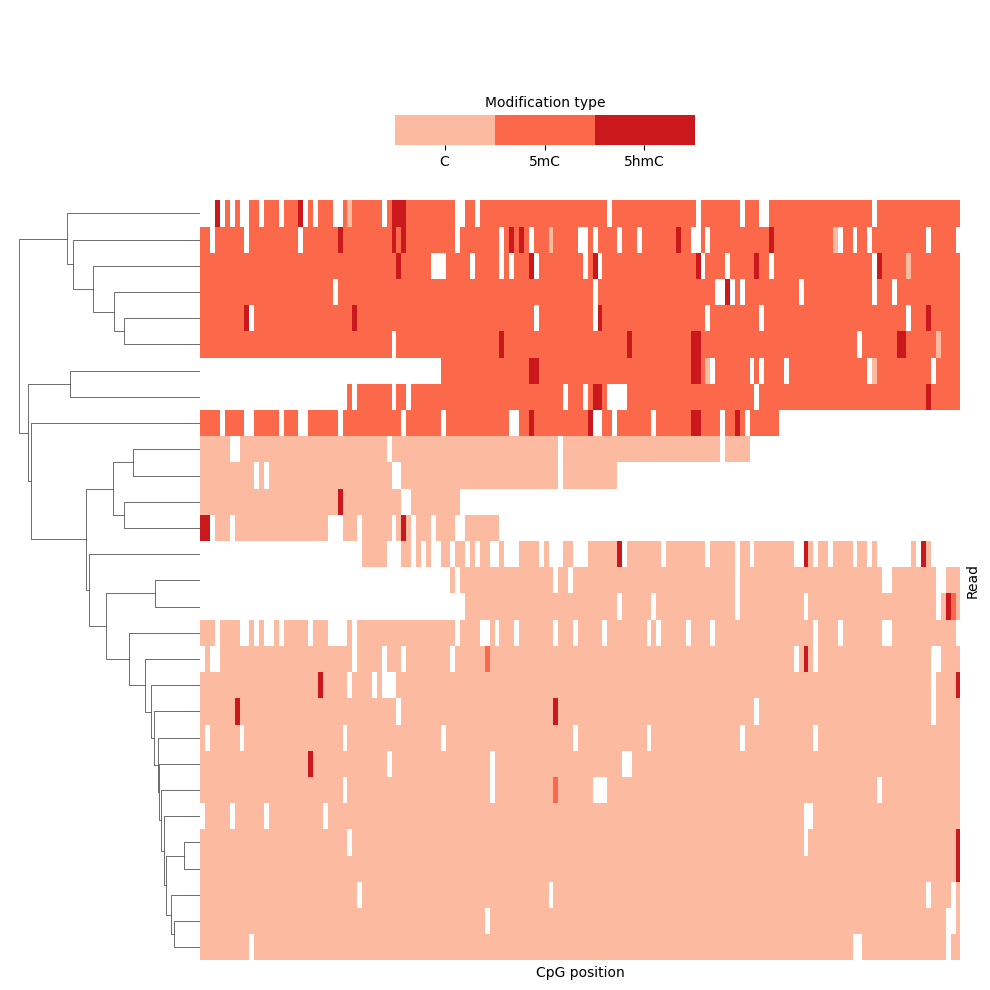

In [395]:
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()

g = sns.clustermap(NADropper(pivoted_cpg_melted).fillna(-1), 
            mask=NADropper(pivoted_cpg_melted).isna(), 
            xticklabels=False, yticklabels=False,
            col_cluster=False, 
            cmap=sns.color_palette("Reds", 3),
            cbar_kws={"ticks" : [0, 1, 2],
                      "orientation" : "horizontal"},
            figsize=(10, 10))

g.ax_cbar.set_position([0.40, 0.85, 0.3, 0.03])
g.ax_cbar.set_xticks([0.33, 1, 1.66])
g.ax_cbar.set_xticklabels(["C", "5mC", "5hmC"])
g.ax_cbar.set_title("Modification type", fontdict={"fontsize" : 10})
g.ax_heatmap.set_ylabel("Read")
g.ax_heatmap.set_xlabel("CpG position")

plt.show()
